## STEP 1: Importing all the libraries

In [458]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
print('All libraries imported')

All libraries imported


In [459]:
cd

/Users/tiararaamadia


## STEP 2: Downloading all the datasets

In [379]:
df1 = pd.read_csv('/Users/tiararaamadia/Downloads/Data-Table (1)_Final.csv', sep=';')
df2 = pd.read_csv('/Users/tiararaamadia/Downloads/salaries-by-college-type.csv', sep=';')
df3 = pd.read_csv('/Users/tiararaamadia/Downloads/salaries-by-region.csv')

## STEP 3: Cleaning the data. 

### 1st Database

#### Selecting specific columns out of the database:

In [380]:
headers = ['ACT Code', 'Name', 'Total Percent Admitted', 'Total Percent Admissions Yield', 'Undergraduate Enrollment', 
           'Total Tuition', 'Percent of Undergrad Enrollment that are Women', 
           'Percent of Undergrad Enrollment that are White', 'Degree of Urbanization', 'Percent of freshmen receiving any financial aid']
df0 = [df1["AC Code"], df1["Name"], df1['Percent admitted - total'], df1['Admissions yield - total'], 
        df1['Undergraduate enrollment'], df1['Tuition and fees, 2013-14'], 
        df1['Percent of undergraduate enrollment that are women'], 
        df1['Percent of undergraduate enrollment that are White'], 
        df1['Degree of urbanization (Urban-centric locale)'], df1['Percent of freshmen receiving any financial aid'] ]
college_info = pd.concat(df0, axis=1, keys=headers)

In [381]:
college_info.sample(1)

,ACT Code,Name,Total Percent Admitted,Total Percent Admissions Yield,Undergraduate Enrollment,Total Tuition,Percent of Undergrad Enrollment that are Women,Percent of Undergrad Enrollment that are White,Degree of Urbanization,Percent of freshmen receiving any financial aid
524,NaN,Illinois Wesleyan University,58,25,2009,39316,56,74,City: Small,99


#### Filtering out uneccessary rows, similarizing all names into uppercase then converting the index column to be merged upon into numeric value. I also deleted any duplicate School Names:

In [382]:
college_info = college_info.drop(766)

In [383]:
college_info['Name'] = college_info['Name'].str.upper()
college_info['ACT Code'] = college_info['ACT Code'].fillna(0).astype(int)

In [384]:
college_info = college_info.drop_duplicates(subset=["Name"])

### 2nd Database


#### Dropping unneccessary rows, changing column names to be similar to the 1st database so it's easier to merge. Using regex to similarize the names of each university (removing abbreviations when 1st database didnt have any, for example).

In [385]:
df2.drop(['Mid-Career 90th Percentile Salary', 'Mid-Career 10th Percentile Salary', 'Unnamed: 9'], axis=1, inplace=True)

In [386]:
college_salary = df2.rename(columns={'School Name': 'Name'})
college_salary['Name'] = college_salary['Name'].str.upper()

In [387]:
college_salary['Name'] = college_salary['Name'].str.replace(r"\(.*?\)","")
college_salary = college_salary.drop_duplicates(subset=["Name"])
college_salary.head(3)

/var/folders/53/lfgpw9jn08zczcfctzqj5rkw0000gn/T/ipykernel_630/517137961.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  college_salary['Name'] = college_salary['Name'].str.replace(r"\(.*?\)","")


,ACT Code,Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
0,1774.0,AMHERST COLLEGE,Liberal Arts,"$54,500.00","$107,000.00","$84,900.00","$162,000.00"
1,3062.0,APPALACHIAN STATE UNIVERSITY,State,"$40,400.00","$69,100.00","$50,400.00","$90,800.00"
2,88.0,ARIZONA STATE UNIVERSITY,Party,"$47,400.00","$84,100.00","$60,700.00","$114,000.00"


#### Merging both database on ACT Code, dropping duplicate Name column and turning all number-filled columns into numeric type:

In [388]:
data = pd.merge(left=college_info, right=college_salary, left_on='ACT Code', right_on='ACT Code')
data.drop(['Name_y'], axis=1, inplace=True)
data = data.rename(columns={'Name_x': 'Name'})

In [389]:
data.dtypes

ACT Code                                            int64
Name                                               object
Total Percent Admitted                             object
Total Percent Admissions Yield                     object
Undergraduate Enrollment                           object
Total Tuition                                      object
Percent of Undergrad Enrollment that are Women     object
Percent of Undergrad Enrollment that are White     object
Degree of Urbanization                             object
Percent of freshmen receiving any financial aid    object
School Type                                        object
Starting Median Salary                             object
Mid-Career Median Salary                           object
Mid-Career 25th Percentile Salary                  object
Mid-Career 75th Percentile Salary                  object
dtype: object

In [390]:
titles = ['Total Percent Admitted', 'Total Percent Admissions Yield', 'Undergraduate Enrollment',
          'Total Tuition', 'Percent of Undergrad Enrollment that are Women',
          'Percent of Undergrad Enrollment that are White', 'Percent of freshmen receiving any financial aid']        
data[titles] = data[titles].apply(pd.to_numeric, errors='coerce', axis=1)

#### Removing all the dollar signs, commas in the Salary column so we can convert it into numeric type for calculation:

In [391]:
dollar_cols = ['Starting Median Salary', 'Mid-Career Median Salary', 
               'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary']
for x in dollar_cols:
    data[x] = data[x].str.replace("$","")
    data[x] = data[x].str.replace(",","")
    data[x] = pd.to_numeric(data[x])

/var/folders/53/lfgpw9jn08zczcfctzqj5rkw0000gn/T/ipykernel_630/1724908412.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[x] = data[x].str.replace("$","")


In [392]:
data.dtypes

ACT Code                                             int64
Name                                                object
Total Percent Admitted                             float64
Total Percent Admissions Yield                     float64
Undergraduate Enrollment                           float64
Total Tuition                                      float64
Percent of Undergrad Enrollment that are Women     float64
Percent of Undergrad Enrollment that are White     float64
Degree of Urbanization                              object
Percent of freshmen receiving any financial aid    float64
School Type                                         object
Starting Median Salary                             float64
Mid-Career Median Salary                           float64
Mid-Career 25th Percentile Salary                  float64
Mid-Career 75th Percentile Salary                  float64
dtype: object

In [720]:
data.sample(3)

,ACT Code,Name,Total Percent Admitted,Total Percent Admissions Yield,Undergraduate Enrollment,Total Tuition,Percent of Undergrad Enrollment that are Women,Percent of Undergrad Enrollment that are White,Degree of Urbanization,Percent of freshmen receiving any financial aid,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mostly Women,Mostly White,Women/White
190,3163,UNIVERSITY OF NORTH CAROLINA AT CHARLOTTE,69.0,38.0,21503.0,6107.0,48.0,61.0,City: Large,75.0,State,43100.0,74000.0,53200.0,99500.0,No,Yes,PWI Male Dominated
201,4274,UNIVERSITY OF UTAH,82.0,34.0,24492.0,7457.0,45.0,70.0,City: Midsize,64.0,State,45400.0,83200.0,58400.0,116000.0,No,Yes,PWI Male Dominated
114,2150,ST OLAF COLLEGE,59.0,32.0,3125.0,40700.0,56.0,78.0,Town: Distant,93.0,Liberal Arts,45300.0,86200.0,61000.0,120000.0,Yes,Yes,PWI Female Dominated


## STEP 4: Using data to answer questions

### 1. Do women make less money coming out of college?

#### One question I want to answer is to figure out gender bias in post-undergraduate outcomes.

I made another column assigning a boolean 0,1 amount for colleges who have >50 women undergraduate enrollment and map out their average salary progressions from Starting to Mid-Career.

In [523]:
def if_women(series): 
    if series > 50: 
        series = 'Yes'
    else: 
        series = 'No'
    return series

In [524]:
data['Mostly Women'] = data['Percent of Undergrad Enrollment that are Women'].apply(if_women)
women_salary = data[['Mostly Women', 'Starting Median Salary', 
                     'Mid-Career Median Salary', 'Mid-Career 25th Percentile Salary', 
                     'Mid-Career 75th Percentile Salary']]
women_salary = women_salary.dropna()

#### Calculating value counts so we can see sample size and take that into account before doing calculations for analysis:

In [525]:
women_salary.value_counts('Mostly Women')

Mostly Women
Yes    152
No      84
dtype: int64

#### Grouping average Salaries for each categories, arranging it into ascending order:

In [526]:
women_salary.groupby('Mostly Women').mean().sort_values(by='Starting Median Salary', ascending=False)

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
Mostly Women,,,,
No,49828.571429,91048.809524,67008.333333,124020.238095
Yes,44027.631579,79985.526316,56813.815789,111846.710526


#### Conducting a t-test on independent sample groups so I can see if the difference between means is statistically significant, meaning its valid:

In [527]:
from scipy.stats import ttest_ind

men = women_salary[women_salary['Mostly Women']== 'No']
women = women_salary[women_salary['Mostly Women']== 'Yes']

In [528]:
print('P-value, T-Test for Starting Salary:', ttest_ind(men['Starting Median Salary'], women['Starting Median Salary']).pvalue)
print('P-value, T-Test for Mid-Career Salary:', ttest_ind(men['Mid-Career Median Salary'], women['Mid-Career Median Salary']).pvalue)
print('P-value, T-Test for Mid-Career 25th Percentile Salary:', ttest_ind(men['Mid-Career 25th Percentile Salary'], women['Mid-Career 25th Percentile Salary']).pvalue)
print('P-value, T-Test for Mid-Career 75th Percentile Salary:',ttest_ind(men['Mid-Career 75th Percentile Salary'], women['Mid-Career 75th Percentile Salary']).pvalue)

P-value, T-Test for Starting Salary: 2.5235878725001997e-11
P-value, T-Test for Mid-Career Salary: 2.3215789400013953e-08
P-value, T-Test for Mid-Career 25th Percentile Salary: 4.3409860140556835e-11
P-value, T-Test for Mid-Career 75th Percentile Salary: 0.00017652475392617025


In [529]:
women_data = women_salary.groupby('Mostly Women').mean()

In [530]:
women_data = women_data.reset_index()

#### After resetting index so said categories are a column of their own, I built a bar graph that maps out Salary Progresses by type of category churned out by the if_women function

I put titles, x and ylabels and made sure that the colors were distinct enough for difference. I also converted it into a horizontal bar graph so differences between individual bars are easier to see (in my opinion).

Text(0.5, 0, 'Salary in USD ($)')

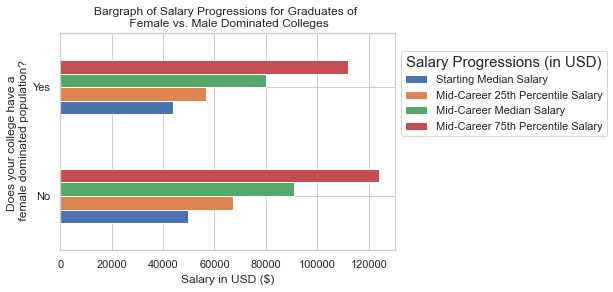

In [760]:
graph1 = women_data.plot(title ='Bargraph of Salary Progressions for Graduates of \n Female vs. Male Dominated Colleges', xlabel = 'Does your college have a \n female dominated population?',
                        x="Mostly Women", 
                        y=['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary',
                     'Mid-Career 75th Percentile Salary'], kind="barh")
graph1.legend(title='Salary Progressions (in USD)',title_fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
graph1.set_xlabel('Salary in USD ($)')

#### Answer: 

Graduates of colleges with a female dominated undergraduate enrollment earn less throughout their career, on average, than graduates of colleges with a male dominated undegraduate enrollment. This difference is statistically significant since T-Test results measuring differences between the average starting and mid-career median salaries between all colleges in the database have a p-value <0.000013. 

Frankly speaking, this means that gender bias is still alive and well within our society, presenting itself in post-graduate salary outcomes of different colleges.

### 2. Do white people make more money coming out of college?

#### I also want to figure out racial bias in post-undergraduate outcomes. The method of answering is exactly the same as previous.

In [534]:
def if_white(series): 
    if series > 50: 
        series = 'Yes'
    else: 
        series = 'No'
    return series

In [632]:
data['Mostly White'] = data['Percent of Undergrad Enrollment that are White'].apply(if_white)
race_salary = data[['Mostly White', 'Starting Median Salary', 
                     'Mid-Career Median Salary', 'Mid-Career 25th Percentile Salary', 
                     'Mid-Career 75th Percentile Salary']]
race_salary = race_salary.dropna()
race_salary.head(2)

,Mostly White,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
0,No,54500.0,107000.0,84900.0,162000.0
1,Yes,40400.0,69100.0,50400.0,90800.0


In [536]:
race_salary.value_counts('Mostly White')

Mostly White
Yes    181
No      55
dtype: int64

In [637]:
race_data = race_salary.groupby('Mostly White').mean().sort_values(by='Starting Median Salary', ascending=False)
race_data.reset_index(inplace=True)
race_data

,Mostly White,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
0,No,50860.000000,93903.636364,67781.818182,130718.181818
1,Yes,44643.646409,80890.607735,58212.154696,111761.878453


In [289]:
from scipy.stats import ttest_ind

poc = race_salary[race_salary['Mostly White']== 'No']
white = race_salary[race_salary['Mostly White']== 'Yes']

In [405]:
print('P-value, T-Test for Starting Salary:', ttest_ind(poc['Starting Median Salary'], white['Starting Median Salary']).pvalue)
print('P-value, T-Test for Mid-Career Salary:', ttest_ind(poc['Mid-Career Median Salary'], white['Mid-Career Median Salary']).pvalue)
print('P-value, T-Test for Mid-Career 25th Percentile Salary:', ttest_ind(poc['Mid-Career 25th Percentile Salary'], white['Mid-Career 25th Percentile Salary']).pvalue)
print('P-value, T-Test for Mid-Career 75th Percentile Salary:',ttest_ind(poc['Mid-Career 75th Percentile Salary'], white['Mid-Career 75th Percentile Salary']).pvalue)

P-value, T-Test for Starting Salary: 3.3852126694857343e-10
P-value, T-Test for Mid-Career Salary: 5.958798017866571e-09
P-value, T-Test for Mid-Career 25th Percentile Salary: 7.369225876338342e-08
P-value, T-Test for Mid-Career 75th Percentile Salary: 1.6991033427168054e-07


Text(0.5, 0, 'Salary in USD ($)')

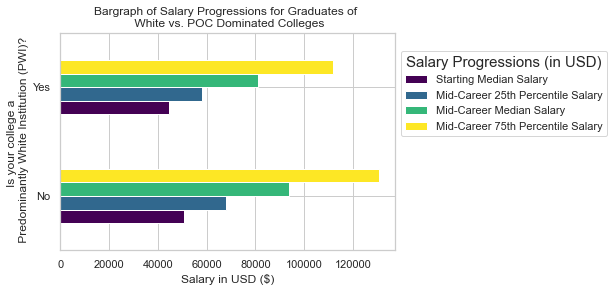

In [759]:
graph2 = race_data.plot(title ='Bargraph of Salary Progressions for Graduates of \n White vs. POC Dominated Colleges', 
                        ylabel = 'Salary USD',
                        xlabel = 'Is your college a \n Predominantly White Institution (PWI)?',
                        x= "Mostly White", 
                        y=['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary',
                     'Mid-Career 75th Percentile Salary'], kind="barh", cmap='viridis')
graph2.legend(title='Salary Progressions (in USD)',title_fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
graph2.set_xlabel('Salary in USD ($)')

#### Answer: 
Graduates of non-PWI colleges earn more throughout their career, on average, than graduates of colleges in a PWI. This difference is statistically significant since T-Test results measuring differences between the average starting and mid-career median salaries between all colleges in the database have a p-value <0.0007. 

This is a bit confusing for me since I thought the data points in the opposite direction. One thing I could have done better is to take rank into consideration, since the number of PWIs might also include smaller state colleges in lower earning states that are not that well known.

### 3. Do gender and race play a part in post-undergraduate salary?

#### The method of answering to this question is very similar to the last 2, except the function divides into 4 categories and not just 2.

In [629]:
data.head(1)

,ACT Code,Name,Total Percent Admitted,Total Percent Admissions Yield,Undergraduate Enrollment,Total Tuition,Percent of Undergrad Enrollment that are Women,Percent of Undergrad Enrollment that are White,Degree of Urbanization,Percent of freshmen receiving any financial aid,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mostly Women,Mostly White,Women/White
0,1774,AMHERST COLLEGE,14.0,41.0,1785.0,46574.0,50.0,42.0,Suburb: Large,65.0,Liberal Arts,54500.0,107000.0,84900.0,162000.0,No,No,Less White & Women


In [673]:
def f(series):
    if series['Percent of Undergrad Enrollment that are Women'] > 50 and series['Percent of Undergrad Enrollment that are White'] > 50:
        return 'PWI Female Dominated'
    elif series['Percent of Undergrad Enrollment that are Women'] <= 50 and series['Percent of Undergrad Enrollment that are White'] > 50:
        return 'PWI Male Dominated'
    elif series['Percent of Undergrad Enrollment that are Women'] > 50 and series['Percent of Undergrad Enrollment that are White'] <= 50:
        return 'Non-PWI Female Dominated'
    elif series['Percent of Undergrad Enrollment that are Women'] <= 50 and series['Percent of Undergrad Enrollment that are White'] <= 50:
        return 'Non-PWI Male Dominated'

data['Women/White'] = data.apply(f, axis=1)

In [668]:
women_white = data[['Mostly Women', 'Women/White', 'Starting Median Salary', 
                     'Mid-Career Median Salary', 'Mid-Career 25th Percentile Salary', 
                     'Mid-Career 75th Percentile Salary']]

#### Super interesting that there are more female dominated PWIs but that could also be due to the trend of more women going to college than men. 

In [669]:
women_white.value_counts('Women/White')

Women/White
PWI Female Dominated        115
PWI Male Dominated           66
Non-PWI Female Dominated     37
Non-PWI Male Dominated       18
dtype: int64

In [763]:
intersection_data = women_white.groupby('Women/White').mean().sort_values(by='Mid-Career Median Salary', ascending=False)
intersection_data = intersection_data.reset_index()
intersection_data

,Women/White,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
0,Non-PWI Male Dominated,58583.333333,108311.111111,80766.666667,150983.333333
1,Non-PWI Female Dominated,47102.702703,86894.594595,61464.864865,120859.459459
2,PWI Male Dominated,47440.909091,86340.909091,63256.060606,116666.666667
3,PWI Female Dominated,43038.260870,77762.608696,55317.391304,108946.956522


#### ANOVA Test for Difference between >2 Means

In [772]:
import scipy.stats as stats

nonpwi_m = women_white[women_white['Women/White']== 'Non-PWI Male Dominated']
nonpwi_f = women_white[women_white['Women/White']== 'Non-PWI Female Dominated']
pwi_m = women_white[women_white['Women/White']== 'PWI Male Dominated']
pwi_f = women_white[women_white['Women/White']== 'PWI Female Dominated']


# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(nonpwi_m['Starting Median Salary'], nonpwi_f['Starting Median Salary'],
                                pwi_m['Starting Median Salary'], pwi_f['Starting Median Salary'])
print("P-Value for the Anova Test is ", pvalue)

P-Value for the Anova Test is  2.435856451367616e-24


Text(0.5, 0, 'Salary in USD ($)')

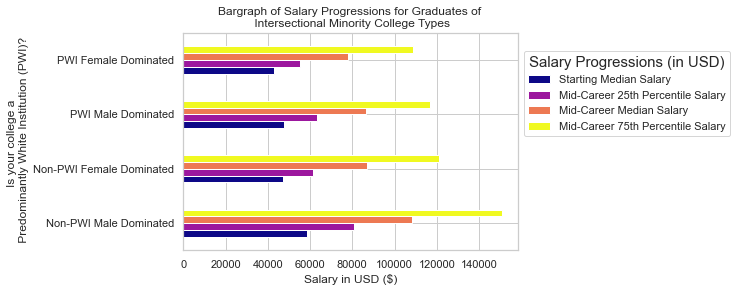

In [764]:
graph3 = intersection_data.plot(title ='Bargraph of Salary Progressions for Graduates of \n Intersectional Minority College Types', 
                        ylabel = '($) USD',
                        xlabel = 'Is your college a \n Predominantly White Institution (PWI)?',
                        x= "Women/White", 
                        y=['Starting Median Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career Median Salary', 
                     'Mid-Career 75th Percentile Salary'], kind="barh", cmap='plasma')
graph3.legend(title='Salary Progressions (in USD)',title_fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
graph3.set_xlabel('Salary in USD ($)')

### 4. How important is the role of socioeconomic class in post-undergraduate salary?

#### First, I mapped out the salary progressions of different school types in ascending order so we can see a clear pattern. 

In [578]:
college_type = data[['School Type', 'Starting Median Salary', 
                     'Mid-Career Median Salary', 'Mid-Career 25th Percentile Salary', 
                     'Mid-Career 75th Percentile Salary', 'Percent of freshmen receiving any financial aid']]
type_salary = college_type.groupby('School Type').mean().sort_values(by='Starting Median Salary', ascending=False)
type_salary.reset_index(inplace=True)
type_salary

,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Percent of freshmen receiving any financial aid
0,Ivy League,60475.000000,120125.000000,82787.500000,184125.000000,68.125000
1,Engineering,59238.888889,104422.222222,81355.555556,135583.333333,89.166667
2,Liberal Arts,45736.363636,89197.727273,62159.090909,130922.727273,74.681818
3,Party,45715.000000,84685.000000,60005.000000,118100.000000,82.350000
4,State,43842.465753,77718.493151,56182.191781,105358.219178,82.191781


#### Then, I mapped out financial aid assistance per School Type

In [399]:
data[['School Type', 'Percent of freshmen receiving any financial aid']].groupby('School Type').mean().sort_values(by='Percent of freshmen receiving any financial aid', ascending=False)

,Percent of freshmen receiving any financial aid
School Type,
Engineering,89.166667
Party,82.350000
State,82.191781
Liberal Arts,74.681818
Ivy League,68.125000


#### Used a twinned line graph to showcase financial aid and salary progression data against the same categorical x variable.

Text(0.5, 1.0, 'Line Chart of Different School Types and \n their Salary Progressions vs. Needed Financial Aid')

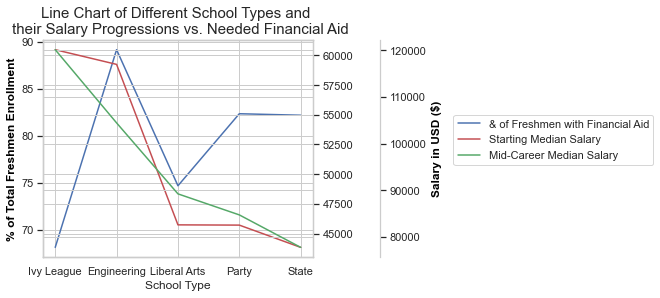

In [717]:
fig,ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

twin2.spines.right.set_position(("axes", 1.25))

p1, = ax.plot(type_salary['School Type'], type_salary['Percent of freshmen receiving any financial aid'],
              "b-", label="& of Freshmen with Financial Aid")
p2, = twin1.plot(type_salary['School Type'], type_salary['Starting Median Salary'], "r-", label="Starting Median Salary")
p3, = twin2.plot(type_salary['School Type'], type_salary['Mid-Career Median Salary'], "g-", label="Mid-Career Median Salary")

ax.set_xlabel("School Type")
ax.set_ylabel("% of Total Freshmen Enrollment", fontweight='bold')
twin1.set_ylabel("")
twin2.set_ylabel("Salary in USD ($)", fontweight='bold')

ax.yaxis.label.set_color('black')
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color('black')

ax.legend(handles=[p1, p2, p3], loc='lower left', bbox_to_anchor=(1.5, 0.4))
ax.set_title('Line Chart of Different School Types and \n their Salary Progressions vs. Needed Financial Aid', fontsize=15)

#graph2.legend(title='Salary Progressions',title_fontsize=15,loc='lower left', bbox_to_anchor=(1, 0.5))
